# Dragon Real Estate-Price Predictor

In [1]:
import pandas as pd

In [2]:
housing = pd.read_csv("data.csv")

In [3]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     503 non-null    float64
 1   ZN       503 non-null    float64
 2   INDUS    503 non-null    float64
 3   CHAS     503 non-null    int64  
 4   NOX      503 non-null    float64
 5   RM       499 non-null    float64
 6   AGE      503 non-null    float64
 7   DIS      503 non-null    float64
 8   RAD      503 non-null    int64  
 9   TAX      503 non-null    int64  
 10  PTRATIO  503 non-null    float64
 11  B        503 non-null    float64
 12  LSTAT    503 non-null    float64
 13  MEDV     503 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.1 KB


In [5]:
housing['CHAS'].value_counts()

CHAS
0    468
1     35
Name: count, dtype: int64

In [6]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,503.000000,503.000000,503.000000,503.000000,503.000000,499.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000
mean,3.633693,11.431412,11.168628,0.069583,0.555091,6.286760,68.577734,3.786880,9.588469,409.139165,18.451292,356.481292,12.689761,22.504970
std,8.623194,23.375438,6.865424,0.254695,0.116077,0.704928,28.218484,2.108693,8.718234,168.609418,2.168204,91.531641,7.143408,9.202357
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082325,0.000000,5.190000,0.000000,0.449000,5.887500,44.700000,2.094100,4.000000,279.500000,17.350000,375.270000,7.065000,16.900000
50%,0.259150,0.000000,9.690000,0.000000,0.538000,6.209000,77.700000,3.182700,5.000000,330.000000,19.100000,391.430000,11.410000,21.200000
75%,3.685665,12.500000,18.100000,0.000000,0.624000,6.627000,94.100000,5.164950,24.000000,666.000000,20.200000,396.235000,17.025000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
%matplotlib inline

In [8]:
#import matplotlib.pyplot as plt
#housing.hist(bins=50,figsize=(20,15))


## Train-Test Splitting

In [9]:
#import numpy as np
def split_train_test(data,test_ratio):
    np.random.seed(42)
    shuffled = np.random.permutation(len(data))
    print(shuffled)
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled[:test_set_size]
    train_indices = shuffled[test_set_size:]
    return data.iloc[train_indices],data.iloc[test_indices]
    

In [10]:
#train_set,test_set = split_train_test(housing,0.2)

In [11]:
from sklearn.model_selection import train_test_split
train_set,test_set=train_test_split(housing, test_size=0.2,random_state=42)
print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}\n")

Rows in train set: 402
Rows in test set: 101



In [12]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits = 1,test_size=0.2,random_state=42)
for train_index,test_index in split.split(housing,housing['CHAS']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [13]:
strat_test_set['CHAS'].value_counts()

CHAS
0    94
1     7
Name: count, dtype: int64

In [14]:
strat_train_set['CHAS'].value_counts()

CHAS
0    374
1     28
Name: count, dtype: int64

In [15]:
#94/7


In [16]:
#374/28

## Looking for Correlations

array([[<Axes: xlabel='MEDV', ylabel='MEDV'>,
        <Axes: xlabel='RM', ylabel='MEDV'>,
        <Axes: xlabel='ZN', ylabel='MEDV'>,
        <Axes: xlabel='LSTAT', ylabel='MEDV'>],
       [<Axes: xlabel='MEDV', ylabel='RM'>,
        <Axes: xlabel='RM', ylabel='RM'>,
        <Axes: xlabel='ZN', ylabel='RM'>,
        <Axes: xlabel='LSTAT', ylabel='RM'>],
       [<Axes: xlabel='MEDV', ylabel='ZN'>,
        <Axes: xlabel='RM', ylabel='ZN'>,
        <Axes: xlabel='ZN', ylabel='ZN'>,
        <Axes: xlabel='LSTAT', ylabel='ZN'>],
       [<Axes: xlabel='MEDV', ylabel='LSTAT'>,
        <Axes: xlabel='RM', ylabel='LSTAT'>,
        <Axes: xlabel='ZN', ylabel='LSTAT'>,
        <Axes: xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

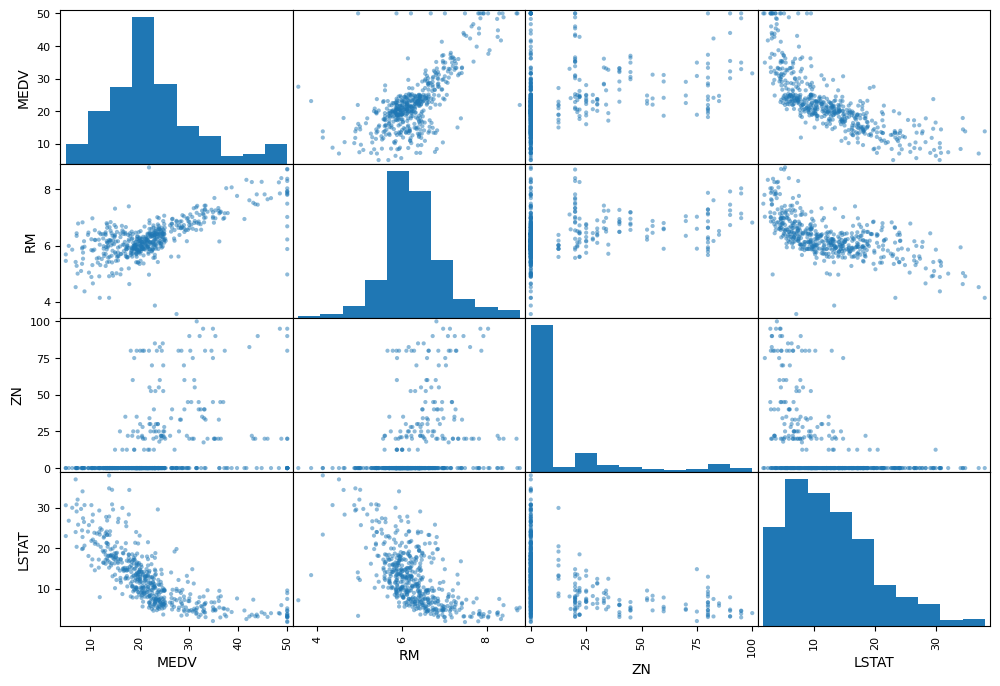

In [17]:
from pandas.plotting import scatter_matrix
attributes = ["MEDV","RM","ZN","LSTAT"]
scatter_matrix(housing[attributes],figsize = (12,8))

<Axes: xlabel='LSTAT', ylabel='MEDV'>

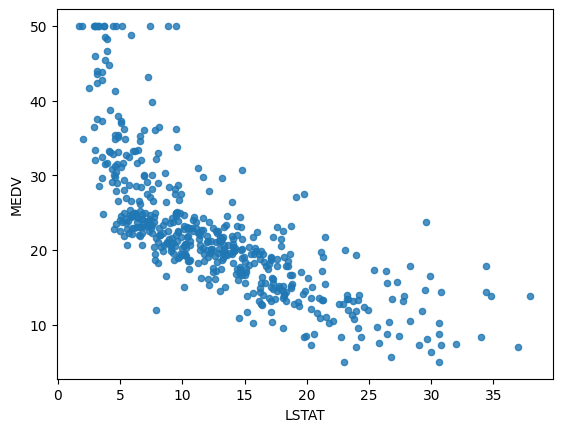

In [18]:
housing.plot(kind="scatter",x="LSTAT",y="MEDV",alpha=0.8)  #throu corr outlayers that is scttered data can be removed

# Trying out Attribute Combination

In [19]:
housing["TAXRM"] = housing["TAX"]/housing["RM"]

In [20]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,45.019011
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,37.688834
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,31.723350
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,31.061984
4,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9,51.729874


In [21]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.693774
ZN         0.363053
B          0.333041
DIS        0.248309
CHAS       0.176550
AGE       -0.376361
RAD       -0.380505
CRIM      -0.388088
NOX       -0.425959
TAX       -0.467340
INDUS     -0.483072
PTRATIO   -0.508022
TAXRM     -0.539347
LSTAT     -0.737132
Name: MEDV, dtype: float64

<Axes: xlabel='TAXRM', ylabel='MEDV'>

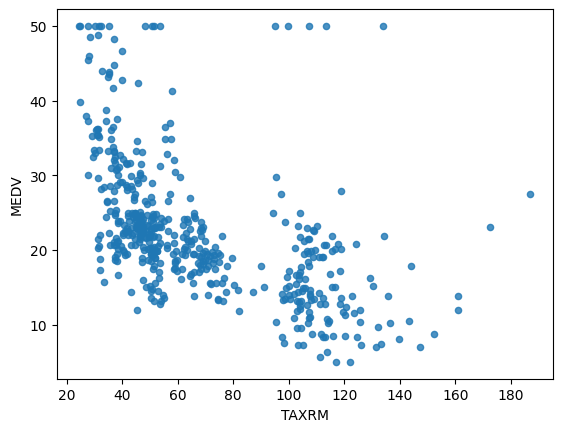

In [22]:
housing.plot(kind="scatter",x="TAXRM",y="MEDV",alpha=0.8)

# Missing Attributes

In [24]:
# to take care of Missing Attribut options:
# 1. get rid of missing points
# 2. get rid of whole attribute
# 3. set the value to some value(0,mean or median)
# here in RM 1,2(as strong correlation so cant do 1 & 2)

In [27]:
a= housing.dropna(subset=["RM"]) #option1
a.shape

(499, 15)